<a href="https://colab.research.google.com/github/yemre-data/DeepLearning_classification_skinlession_detection/blob/main/meta_data_future_importatns_ipyn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import os
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib 

import matplotlib.image as mpimg
from tabulate import tabulate
import missingno as msno 


Using matplotlib backend: agg


In [ ]:
meta_data = pd.read_csv('metadata_orginal.csv')
meta_data.head()

,_id,name,meta.clinical.age_approx,meta.clinical.anatom_site_general,meta.clinical.benign_malignant,meta.clinical.clin_size_long_diam_mm,meta.clinical.diagnosis,meta.clinical.diagnosis_confirm_type,meta.clinical.family_hx_mm,meta.clinical.lesion_id,meta.clinical.mel_class,meta.clinical.mel_mitotic_index,meta.clinical.mel_thick_mm,meta.clinical.mel_type,meta.clinical.mel_ulcer,meta.clinical.melanocytic,meta.clinical.nevus_type,meta.clinical.patient_id,meta.clinical.personal_hx_mm,meta.clinical.sex,meta.acquisition.acquisition_day,meta.acquisition.blurry,meta.acquisition.color_tint,meta.acquisition.dermoscopic_type,meta.acquisition.hairy,meta.acquisition.image_type,meta.acquisition.marker_pen,meta.acquisition.pixelsX,meta.acquisition.pixelsY
0,558d6336bae47801cf734c18,ISIC_0010512,85.0,head/neck,benign,6.0,actinic keratosis,histopathology,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,True,male,NaN,NaN,NaN,NaN,NaN,dermoscopic,NaN,1024.0,768.0
1,558d63f4bae47801cf735083,ISIC_0010889,35.0,anterior torso,benign,7.0,actinic keratosis,histopathology,False,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,False,female,NaN,NaN,NaN,NaN,NaN,dermoscopic,NaN,1024.0,768.0
2,5592cfca9fc3c13155145884,ISIC_0011593,70.0,lower extremity,malignant,NaN,squamous cell carcinoma,histopathology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,female,NaN,NaN,NaN,contact non-polarized,NaN,dermoscopic,NaN,6668.0,4399.0
3,5592dc919fc3c13155145ab7,ISIC_0011726,80.0,lower extremity,malignant,NaN,squamous cell carcinoma,histopathology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,male,NaN,NaN,NaN,contact non-polarized,NaN,dermoscopic,NaN,6668.0,4419.0
4,5592fe8a9fc3c13155145e26,ISIC_0011750,80.0,upper extremity,malignant,NaN,squamous cell carcinoma,histopathology,NaN,NaN,NaN,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,female,NaN,NaN,NaN,contact non-polarized,NaN,dermoscopic,NaN,6641.0,4421.0


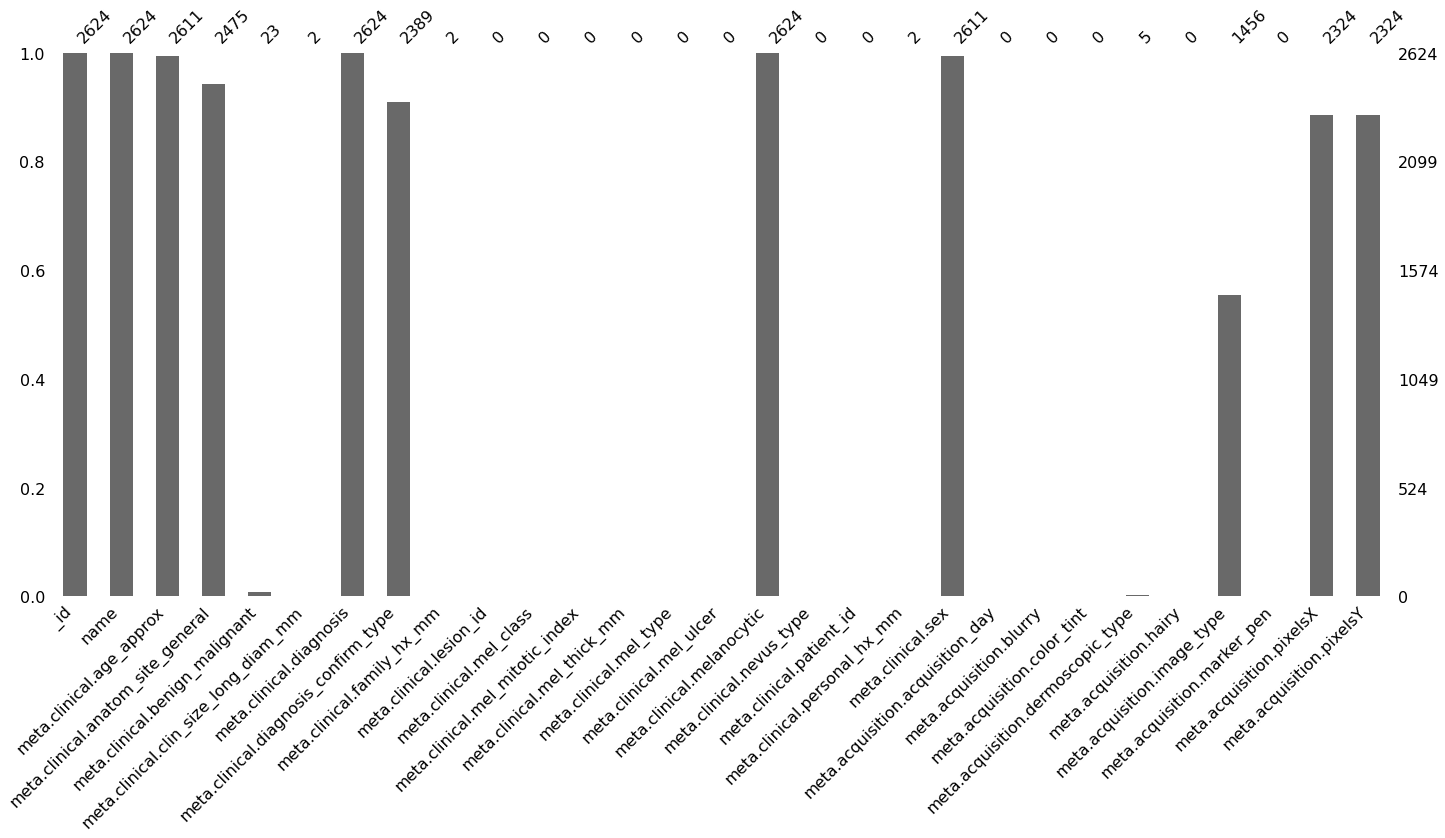

In [ ]:

  
# Visualize the number of missing
# values as a bar chart
msno.bar(meta_data)

In [ ]:
metadata = meta_data[['name','meta.clinical.diagnosis','meta.clinical.age_approx','meta.clinical.anatom_site_general','meta.clinical.sex','meta.clinical.melanocytic','meta.clinical.diagnosis_confirm_type' ]].copy()

In [ ]:
metadata.head()

,name,meta.clinical.diagnosis,meta.clinical.age_approx,meta.clinical.anatom_site_general,meta.clinical.sex,meta.clinical.melanocytic,meta.clinical.diagnosis_confirm_type
0,ISIC_0010512,actinic keratosis,85.0,head/neck,male,False,histopathology
1,ISIC_0010889,actinic keratosis,35.0,anterior torso,female,False,histopathology
2,ISIC_0011593,squamous cell carcinoma,70.0,lower extremity,female,False,histopathology
3,ISIC_0011726,squamous cell carcinoma,80.0,lower extremity,male,False,histopathology
4,ISIC_0011750,squamous cell carcinoma,80.0,upper extremity,female,False,histopathology


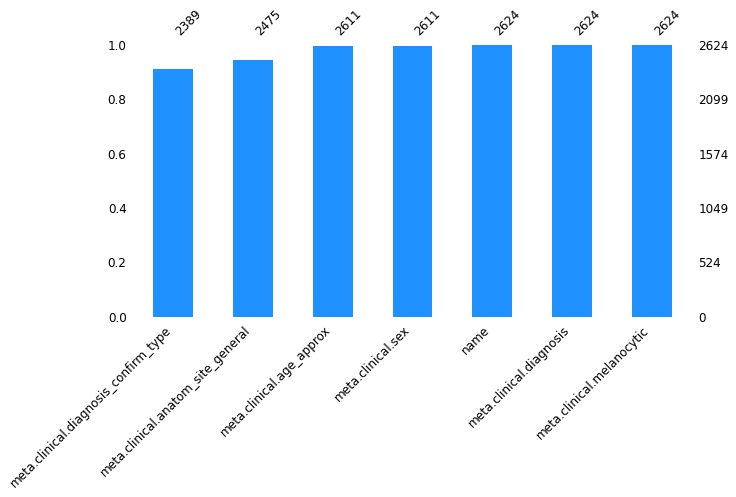

In [ ]:



msno.bar(metadata,color="dodgerblue", sort="ascending", figsize=(10,5), fontsize=12)



In [ ]:
def ratio(column1,column2):
  f, (ax1, ax2) = plt.subplots(ncols=2,nrows=1,figsize = (16, 6))
  colors_nude = ['#e0798c','#65365a','#da8886','#cfc4c4','#dfd7ca']

  a = sns.countplot(metadata[column1], ax = ax1, palette=colors_nude)
  b = sns.countplot(metadata[column2], ax = ax2, palette=colors_nude)
  
  ax1.set_title(column1.capitalize(), fontsize=16)
  ax2.set_title(column2.capitalize(), fontsize=16)


  a.set_xticklabels(a.get_xticklabels(), rotation=35, ha="right")
  b.set_xticklabels(b.get_xticklabels(), rotation=35, ha="right")

  sns.despine(left=True, bottom=True);

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


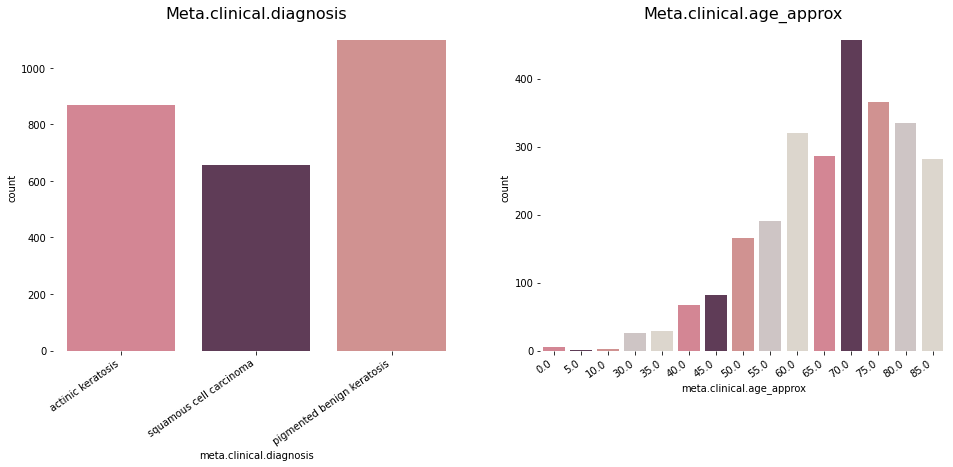

In [ ]:
ratio('meta.clinical.diagnosis','meta.clinical.age_approx');
	 	

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


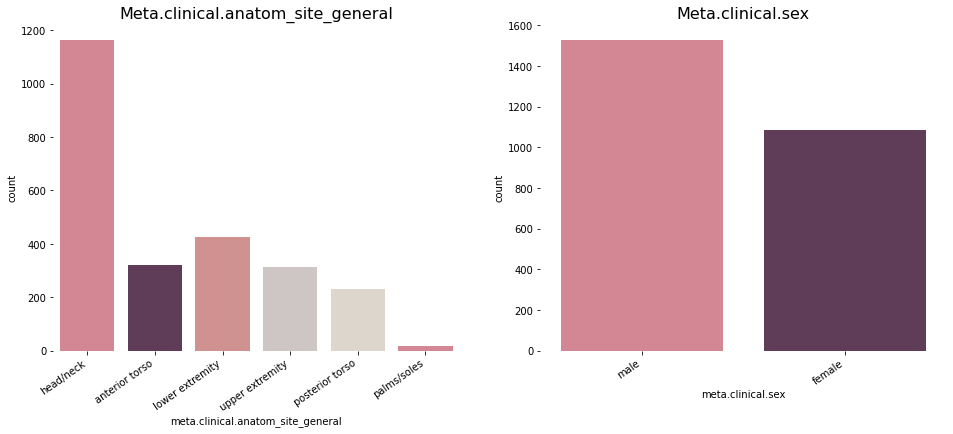

In [ ]:
ratio('meta.clinical.anatom_site_general','meta.clinical.sex')



/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


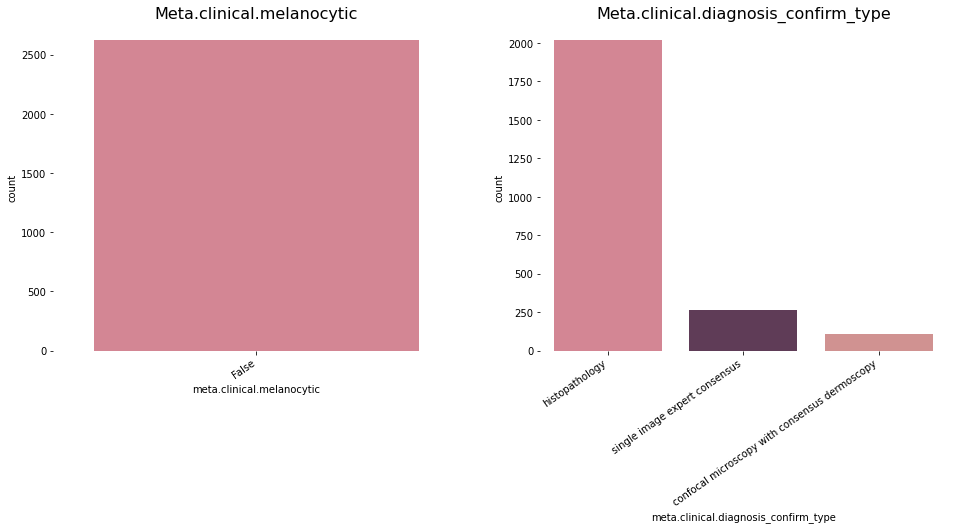

In [ ]:
ratio('meta.clinical.melanocytic','meta.clinical.diagnosis_confirm_type')


In [ ]:
metadata.drop(['meta.clinical.melanocytic'], axis = 1, inplace = True)

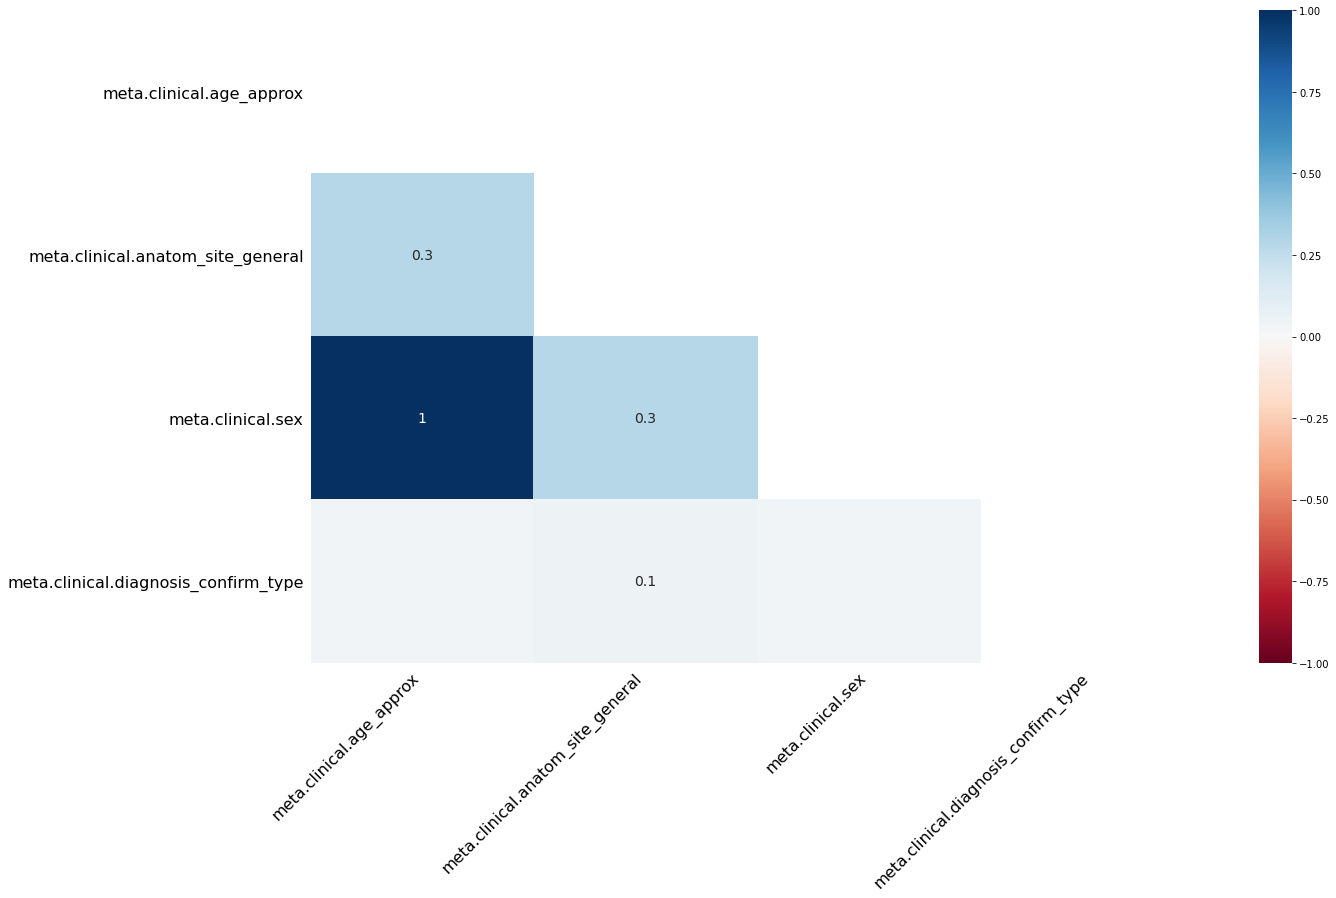

In [ ]:
msno.heatmap(metadata)

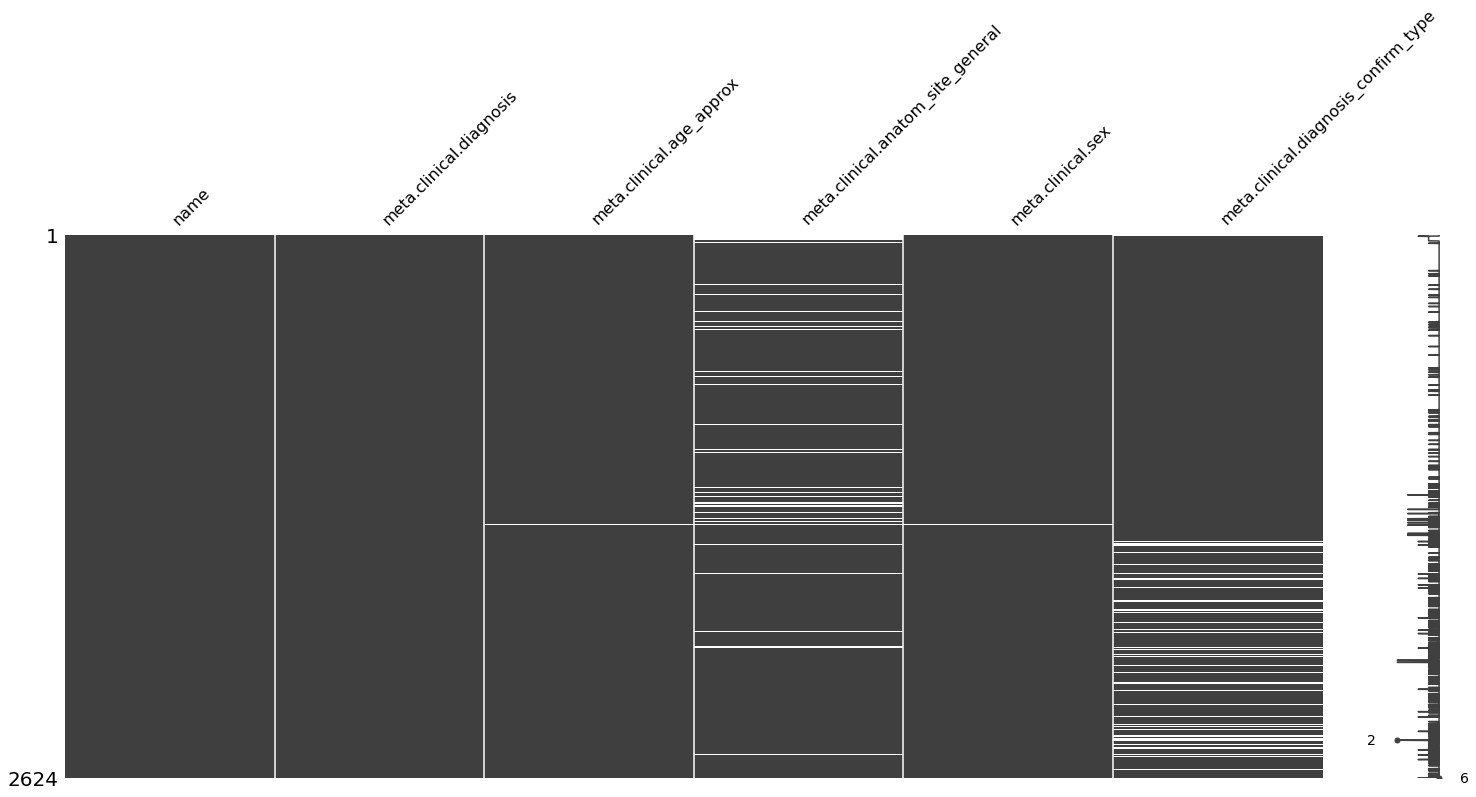

In [ ]:
msno.matrix(metadata)

In [ ]:
	
metadata["meta.clinical.age_approx"].fillna(metadata["meta.clinical.age_approx"].median(), inplace = True)

In [ ]:
metadata["meta.clinical.sex"].fillna('male', inplace = True)

In [ ]:
metadata["meta.clinical.diagnosis_confirm_type"].fillna('histopathology', inplace = True)

In [ ]:
metadata["meta.clinical.anatom_site_general"].fillna(method='ffill',inplace = True)

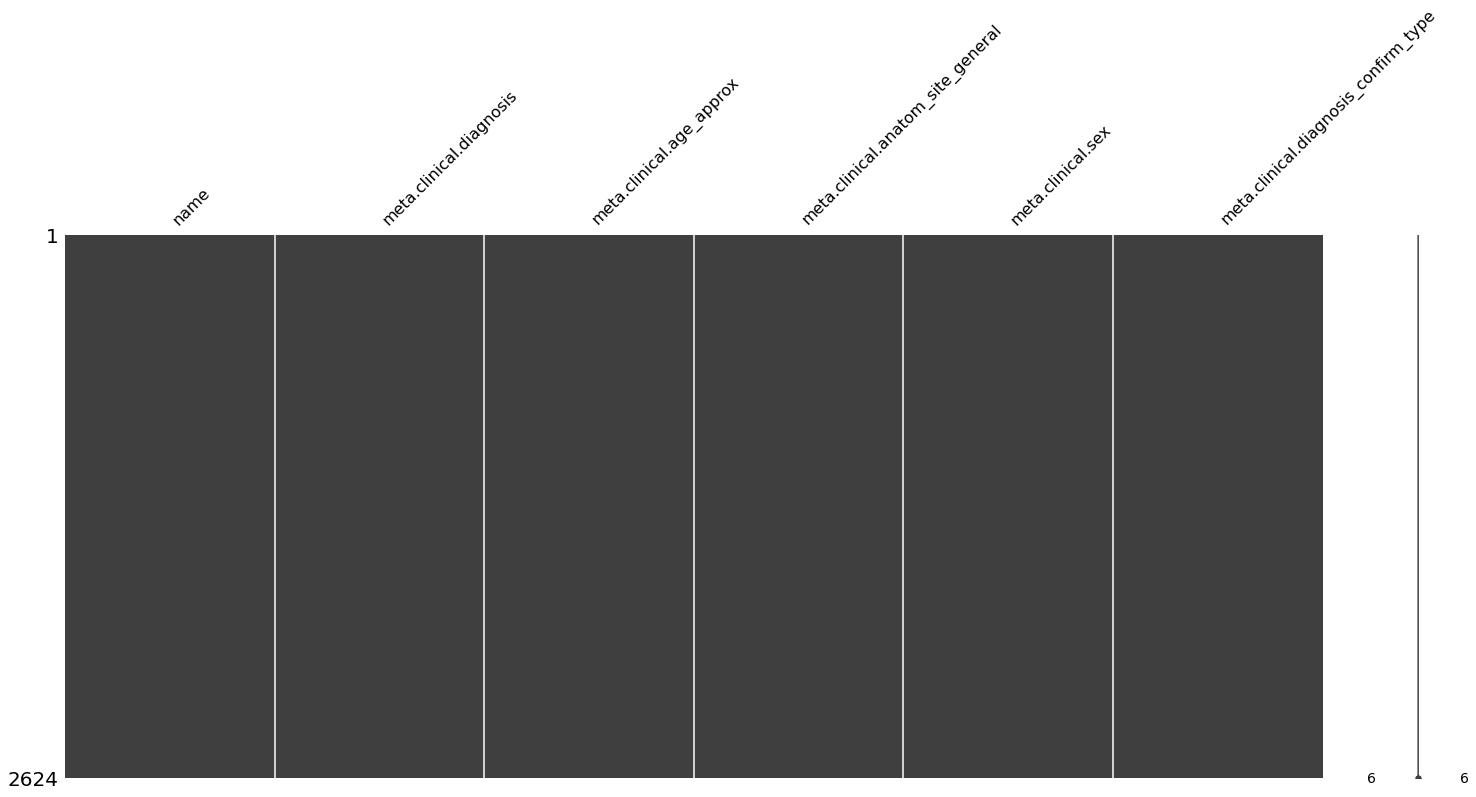

In [ ]:
msno.matrix(metadata)

In [ ]:
metadata['meta.clinical.diagnosis'].unique()

array(['actinic keratosis', 'squamous cell carcinoma',
       'pigmented benign keratosis'], dtype=object)

In [ ]:
metadata['meta.clinical.sex'] = metadata['meta.clinical.sex'].map( {'female': 1, 'male': 0} ).astype(int)
metadata['meta.clinical.diagnosis'] = metadata['meta.clinical.diagnosis'].map( {'pigmented benign keratosis':2,'squamous cell carcinoma': 1, 'actinic keratosis': 0} ).astype(int)
metadata['meta.clinical.anatom_site_general'] = metadata['meta.clinical.anatom_site_general'].map( {'palms/soles':5,'posterior torso':4,'upper extremity':3,'lower extremity':2, 'anterior torso': 1, 'head/neck': 0} ).astype(int)
metadata['meta.clinical.diagnosis_confirm_type'] = metadata['meta.clinical.diagnosis_confirm_type'].map( {'confocal microscopy with consensus dermoscopy':2,'single image expert consensus': 1, 'histopathology': 0} ).astype(int)

In [ ]:

metadata.loc[ metadata['meta.clinical.age_approx'] <= 16, 'meta.clinical.age_approx'] = 0
metadata.loc[(metadata['meta.clinical.age_approx'] > 16) & (metadata['meta.clinical.age_approx'] <= 32), 'meta.clinical.age_approx'] = 1
metadata.loc[(metadata['meta.clinical.age_approx'] > 32) & (metadata['meta.clinical.age_approx'] <= 48), 'meta.clinical.age_approx'] = 2
metadata.loc[(metadata['meta.clinical.age_approx'] > 48) & (metadata['meta.clinical.age_approx'] <= 64), 'meta.clinical.age_approx'] = 3
metadata.loc[ metadata['meta.clinical.age_approx'] > 64, 'meta.clinical.age_approx']=4

In [ ]:
metadata.tail()

,name,meta.clinical.diagnosis,meta.clinical.age_approx,meta.clinical.anatom_site_general,meta.clinical.sex,meta.clinical.diagnosis_confirm_type
2619,ISIC_0073195,1,4.0,2,0,0
2620,ISIC_0073198,0,4.0,2,1,0
2621,ISIC_0073214,0,4.0,0,0,0
2622,ISIC_0073223,1,4.0,3,1,0
2623,ISIC_0073224,0,3.0,0,1,2


In [ ]:
metadata.to_csv('df.csv')

In [ ]:
metadata = metadata[metadata['meta.clinical.anatom_site_general'] != 0]

                                      meta.clinical.diagnosis  ...  meta.clinical.diagnosis_confirm_type
meta.clinical.diagnosis                              1.000000  ...                              0.345940
meta.clinical.age_approx                            -0.071017  ...                             -0.102991
meta.clinical.anatom_site_general                    0.245006  ...                              0.108707
meta.clinical.sex                                   -0.031181  ...                              0.029663
meta.clinical.diagnosis_confirm_type                 0.345940  ...                              1.000000

[5 rows x 5 columns]


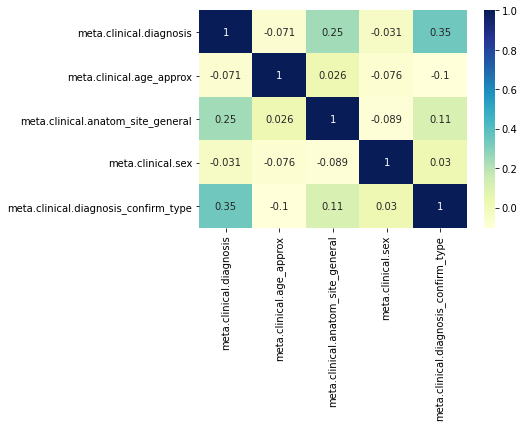

In [ ]:
# prints data that will be plotted
# columns shown here are selected by corr() since
# they are ideal for the plot
print(metadata.corr())
  
# plotting correlation heatmap
dataplot = sns.heatmap(metadata.corr(), cmap="YlGnBu", annot=True)
  
# displaying heatmap
plt.show()

In [ ]:
metadata.tail()

,name,meta.clinical.diagnosis,meta.clinical.age_approx,meta.clinical.anatom_site_general,meta.clinical.sex,meta.clinical.diagnosis_confirm_type
2615,ISIC_0073088,1,4.0,1,0,0
2618,ISIC_0073157,0,3.0,1,0,0
2619,ISIC_0073195,1,4.0,2,0,0
2620,ISIC_0073198,0,4.0,2,1,0
2622,ISIC_0073223,1,4.0,3,1,0


In [ ]:
metadata.to_csv("met.csv")

In [ ]:
train = metadata.copy()
train.drop(['name'], axis = 1, inplace = True)

In [ ]:
import xgboost as xgb

from sklearn.model_selection import StratifiedKFold, train_test_split, cross_val_score, cross_validate
from sklearn.metrics import roc_auc_score, roc_curve


In [ ]:

X = train.drop('meta.clinical.diagnosis', axis=1)
y = train['meta.clinical.diagnosis']

In [ ]:
# taking holdout set for validating with stratified y

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    stratify=y,
                                                    random_state=42)

# 5 fold stratify for cv

cv = StratifiedKFold(5, shuffle=True, random_state=42)

In [ ]:
xg = xgb.XGBClassifier(
    n_estimators=750,
    min_child_weight=0.81,
    learning_rate=0.025,
    max_depth=2,
    subsample=0.80,
    colsample_bytree=0.42,
    gamma=0.10,
    random_state=42,
    n_jobs=-1,
)

In [ ]:
estimators = [xg]

In [ ]:

def model_check(X_train, y_train, estimators, cv):
    model_table = pd.DataFrame()

    row_index = 0
    for est in estimators:

        MLA_name = est.__class__.__name__
        model_table.loc[row_index, 'Model Name'] = MLA_name

        cv_results = cross_validate(est,
                                    X_train,
                                    y_train,
                                    cv=cv,
                                    return_train_score=True,
                                    n_jobs=-1)

        model_table.loc[row_index,
                        'Train  Mean'] = cv_results['train_score'].mean()
        model_table.loc[row_index,
                        'Test  Mean'] = cv_results['test_score'].mean()
        model_table.loc[row_index, 'Test Std'] = cv_results['test_score'].std()
        model_table.loc[row_index, 'Time'] = cv_results['fit_time'].mean()

        row_index += 1

    model_table.sort_values(by=['Test  Mean'],
                            ascending=False,
                            inplace=True)

    return model_table

In [ ]:

raw_models = model_check(X_train, y_train, estimators, cv)
display(raw_models)

,Model Name,Train Mean,Test Mean,Test Std,Time
0,XGBClassifier,0.617438,0.610751,0.017588,1.174663


In [ ]:

xg.fit(X_train, y_train)

# predicting on holdout set
validation = xg.predict_proba(X_test)[:, 1]

# checking results on validation set
#roc_auc_score(y_test, validation)

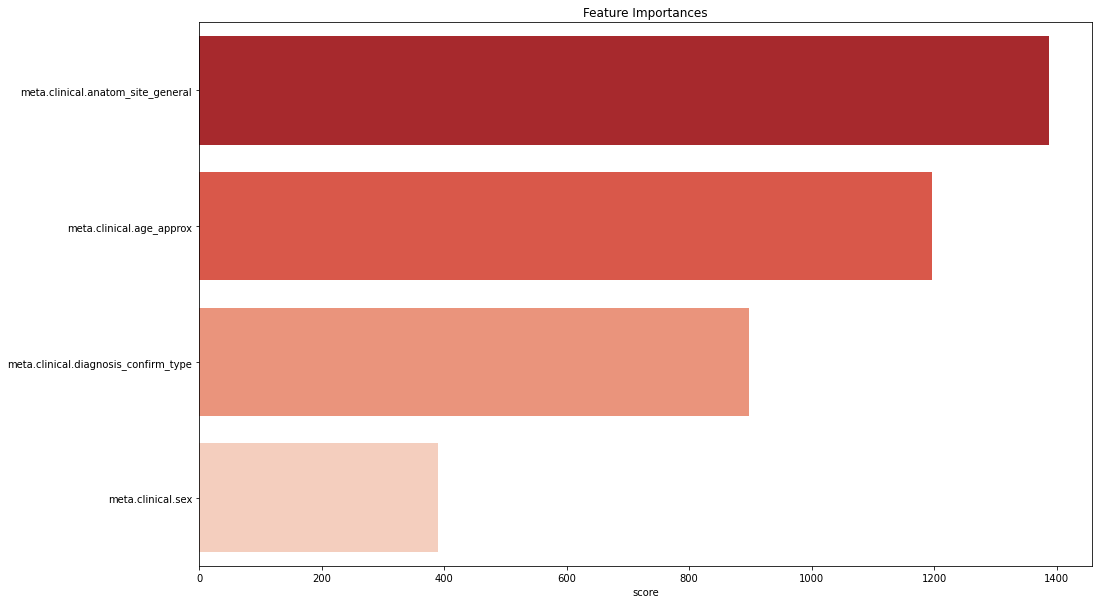

In [ ]:
feature_importance = xg.get_booster().get_score(importance_type='weight')

keys = list(feature_importance.keys())
values = list(feature_importance.values())

importance = pd.DataFrame(data=values, index=keys,
                          columns=['score']).sort_values(by='score',
                                                         ascending=False)
fig, ax = plt.subplots(figsize=(16, 10))
sns.barplot(x=importance.score.iloc[:20],
            y=importance.index[:20],
            orient='h',
            palette='Reds_r')
ax.set_title('Feature Importances')
plt.show()